
# K Nearest Neighbor (KNN)


In [16]:
# Cargamos las librerías típicas de python
import numpy as np              # numpy para los arrays
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib as mpl

# Cargamos el dataset

In [4]:
df = pd.read_csv('C:/Users/gabri/OneDrive/Escritorio/Cursos/Data Science/DataScienceCodersHouse/Clase 22 - Algoritmos y validacion de modelo de ML/diabetes.csv')

In [5]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [6]:
random_seed = 7
# Lista de features que vamos a considerar 
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Variable a predecir
target = 'Outcome'

# Construcción de la matriz de features
X = df[features].to_numpy()
# Construcción del vector a predecir
y = df[target].to_numpy()

# Creacion de las matrices de entrenamiento y testeo. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=random_seed)
print('Dimensión de la matriz de features para entrenamiento: {}'.format(X_train.shape))
print('Dimensión de la matriz de features para testeo: {}'.format(X_test.shape))

Dimensión de la matriz de features para entrenamiento: (614, 8)
Dimensión de la matriz de features para testeo: (154, 8)


In [7]:
# Normalizamos en train
scaler_train = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_train.transform(X_train)

In [11]:
# probar otros números para k
# probar otras distancias, ej: euclidean, minkowski, manhattan 
# probar dar mas peso a los vecinos de un orden superior: weights = 'distance'
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') 
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [17]:
y_pred_train = knn.predict(X_train_scaled)
accuracy_train =  accuracy_score(y_pred_train, y_train)
print('El accuracy en el conjunto de train es', accuracy_train)

El accuracy en el conjunto de train es 0.8371335504885994


In [18]:
# Normalizamos en test
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler_test.transform(X_test)

In [23]:
y_pred_test = knn.predict(X_test_scaled)
accuracy_test =  accuracy_score(y_pred_test, y_test)
print(knn.get_params(deep=True))
print(knn.score(X_test_scaled, y_test, sample_weight=None))
print('El accuracy en el conjunto de test es', accuracy_test)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.7402597402597403
El accuracy en el conjunto de test es 0.7402597402597403


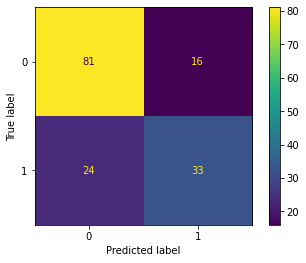

In [20]:
plot_confusion_matrix(knn, X_test_scaled, y_test)  
plt.show()

In [24]:
VP=81;VN=33;FP=16;FN=24
# accuracy es lo cerca que esta el resultado de una medicion del valor verdadero
print('Exactitud:',(VP+VN)/(VP+VN+FN+VN)*100) 
# dispersion del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud
print('Precision:',VP/(VP+FP))
# sensibilidad: proporcion de casos positivios que fueron correctamente identificados
print('Sensibilidad:',VP/(VP+FN))
# especifidad, casos negativos que se detectaron correctamente
print('Especifidad:',VN/(VN+FP))


Exactitud: 66.66666666666666
Precision: 0.8350515463917526
Sensibilidad: 0.7714285714285715
Especifidad: 0.673469387755102


# Ventajas de KNN:
1.Fácil de usar e interpretar (podemos entender por
qué obtuvimos la predicción que obtuvimos)

2.Depende de un único hiperparámetro

4.Entrenamiento súper rápido

5.Útil para sistemas de recomendaciones

6."Buena" performance

# Desventajas de KNN:

1.Es lo que se llama un “ lazy learner ”: no se estiman los parámetros de una f(x,β) que pueda ser aplicada rápidamente a nuevos datos; cada nueva predicción necesita potencialmente todos los datos.

2.Por el ítem anterior, se vuelve lento a la hora de predecir muchos labels

3.Puede tener requerimientos altos de memoria